# Data Exploration of US Flights from 2006-2008
## by Mike Chung

## Preliminary Wrangling

> The United States Department of Transportation's Bureau of Transportation Statistics tracks the performance of domestic flights operated by large air carriers. We downloaded US flight data from 2006-2008 from ASA's <a href='http://stat-computing.org/dataexpo/2009/the-data.html'>Statistic Computing and Graphics website</a> in separate csv files for each year. The variable descriptions can be found on their website. Our first step is data wrangling to transform the data to a form suitable for data exploration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load datasets and describe properties
df_2006 = pd.read_csv('2006.csv.bz2')
df_2007 = pd.read_csv('2007.csv.bz2')
df_2008 = pd.read_csv('2008.csv.bz2')

In [3]:
# next few code cells to get a feel for the data
df_2006.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [4]:
df_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.5+ GB


In [5]:
df_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [6]:
df_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


In [7]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [8]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [9]:
# check that column names are the same for all datasets
# prints nothing if column names are the same
for column in df_2006:
    if column not in df_2007:
        print('{} is not the same.'.format(column))
    if column not in df_2008:
        print('{} is not the same.'.format(column))

In [10]:
# check that the datatypes for the 2006 and 2007 dataset are the same
df_2006.dtypes == df_2007.dtypes

Year                 True
Month                True
DayofMonth           True
DayOfWeek            True
DepTime              True
CRSDepTime           True
ArrTime              True
CRSArrTime           True
UniqueCarrier        True
FlightNum            True
TailNum              True
ActualElapsedTime    True
CRSElapsedTime       True
AirTime              True
ArrDelay             True
DepDelay             True
Origin               True
Dest                 True
Distance             True
TaxiIn               True
TaxiOut              True
Cancelled            True
CancellationCode     True
Diverted             True
CarrierDelay         True
WeatherDelay         True
NASDelay             True
SecurityDelay        True
LateAircraftDelay    True
dtype: bool

In [11]:
# check that the datatypes for the 2006 and 2008 dataset are the same
df_2006.dtypes == df_2008.dtypes

Year                  True
Month                 True
DayofMonth            True
DayOfWeek             True
DepTime               True
CRSDepTime            True
ArrTime               True
CRSArrTime            True
UniqueCarrier         True
FlightNum             True
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin                True
Dest                  True
Distance              True
TaxiIn               False
TaxiOut              False
Cancelled             True
CancellationCode      True
Diverted              True
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [12]:
# convert 2006 and 2007 dataset's inconsistent data types
wrong_dtype = ['TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for column in wrong_dtype:
    df_2006[column] = df_2006[column].astype('float64')
    df_2007[column] = df_2007[column].astype('float64')
    
    # replace the zeroes in the delay times with null values so they are ignored in the plots
    df_2006[column].replace(0, np.nan, inplace = True)
    df_2007[column].replace(0, np.nan, inplace = True)
    df_2008[column].replace(0, np.nan, inplace = True)

In [13]:
# test that the datatypes for the 2006 and 2008 dataset are now the same
df_2006.dtypes == df_2008.dtypes

Year                 True
Month                True
DayofMonth           True
DayOfWeek            True
DepTime              True
CRSDepTime           True
ArrTime              True
CRSArrTime           True
UniqueCarrier        True
FlightNum            True
TailNum              True
ActualElapsedTime    True
CRSElapsedTime       True
AirTime              True
ArrDelay             True
DepDelay             True
Origin               True
Dest                 True
Distance             True
TaxiIn               True
TaxiOut              True
Cancelled            True
CancellationCode     True
Diverted             True
CarrierDelay         True
WeatherDelay         True
NASDelay             True
SecurityDelay        True
LateAircraftDelay    True
dtype: bool

In [14]:
# merge all datasets into single DataFrame
df = df_2006.append(df_2007, ignore_index = True)
df = df.append(df_2008, ignore_index = True)

In [15]:
# look at new merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21604865 entries, 0 to 21604864
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 4.7+ GB


In [16]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
18289006,2008,7,29,2,1358.0,1350,1445.0,1445,WN,898,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3073411,2006,6,4,7,1538.0,1525,1641.0,1629,OO,5703,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
16364996,2008,3,1,6,844.0,840,1420.0,1416,DL,874,...,7.0,22.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5820721,2006,10,14,6,1833.0,1830,1926.0,1930,AA,1121,...,6.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6017422,2006,11,25,6,1756.0,1800,1910.0,1910,WN,825,...,5.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
14020477,2007,12,14,5,2019.0,2025,2157.0,2220,WN,1579,...,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
14439181,2007,12,10,1,602.0,615,712.0,728,NW,1513,...,5.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4852042,2006,9,24,7,1931.0,1923,2249.0,2254,XE,2067,...,6.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
11424685,2007,7,31,2,2039.0,2039,2240.0,2247,AS,324,...,3.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
14094429,2007,12,28,5,1320.0,1320,1650.0,1652,XE,2538,...,5.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### What is the structure of your dataset?

> The combined dataset consists of 29 columns with 21,604,864 rows, a large number of data. The data types include ints, floats and strings. The variable descriptions are displayed on the <a href='http://stat-computing.org/dataexpo/2009/the-data.html'>website</a> where the data was downloaded. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested to know how cancellations and delays depends on the month, the reason and lengths of the delays, and how the delay time affects the time in the air. Therefore, we investigate the dataset with the following questions in mind:
> <ul>
    <li>What months have more delays and cancellations?</li>
    <li>What are the more common reasons for delays and cancellations?</li>
    <li>How does the delay reason and time correlate with the time in the air?</li>
</ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are five variables that are useful for our data analysis. The following variables will support the investigations:
> <ul>
    <li>Month - 1-12</li>
    <li>Cancelled - 1 is Yes, 0 is No</li>
    <li>CancellationCode - Reason for cancellation: A is carrier, B is weather, C is NAS, D is security</li>
    <li>CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay - Time in minutes</li>
    <li>AirTime - Time in minutes</li>
</ul>

## Univariate Exploration

> We start with a univariate exploration of the count for each month.

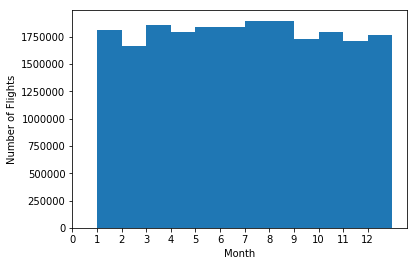

In [17]:
# histogram of the number of flights for each month
bins = np.arange(1, df['Month'].max()+2, 1)
plt.hist(data = df, x = 'Month', bins = bins);
plt.ylabel('Number of Flights');
plt.xlabel('Month');
plt.xticks(np.arange(13));

> We see that from 2006-2008, the number of flights for each month is in the ballpark of 1,700,000. This is important to note, as the results further down can be distorted if a certain month has a lower or higher number of flights.

> Next, we look at the total number of cancellations compared to the the total number not cancelled.

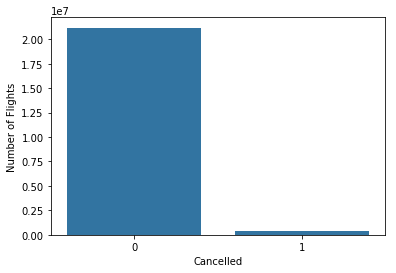

In [18]:
# bar chart of the count of cancellations
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Cancelled', color = base_color);
plt.ylabel('Number of Flights');

> Here, we see that the vast majority of flights were not cancelled. Now, we move on to the univariate exploration of the cancellation and delay reasons.

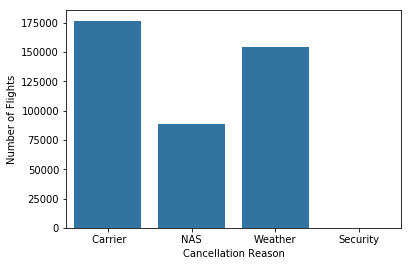

In [19]:
# function to convert cancellation code to string
def convert_code(code):
    if code == 'A':
        return ' Carrier'
    elif code == 'B':
        return 'Weather'
    elif code == 'C':
        return 'NAS'
    elif code == 'D':
        return 'Security'

# create column with cancellation reason
df['CancellationReason'] = df['CancellationCode'].apply(convert_code)
    
# bar chart of the count of each cancellation reason
sb.countplot(data = df, x = 'CancellationReason', color = base_color);
plt.ylabel('Number of Flights');
plt.xlabel('Cancellation Reason');

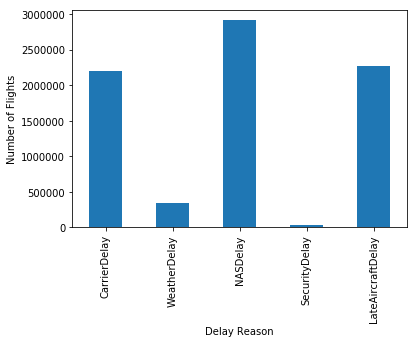

In [20]:
# bar chart of the mean delay time for each delay reason
df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].count().plot(kind = 'bar', color = base_color);
plt.ylabel('Number of Flights');
plt.xlabel('Delay Reason');

> From 2006-2008, the reason which accounted for the most cancellations was the carrier, and NAS for delays. For both cancellations and delays, security was the reason with the least counts. Also, we notice that the delay counts are generally more than an order of magnitude greater than the cancellation counts.

> We look more in-depth at the delay reasons.

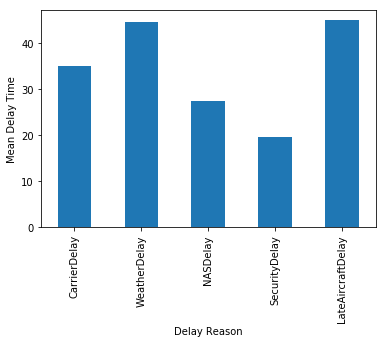

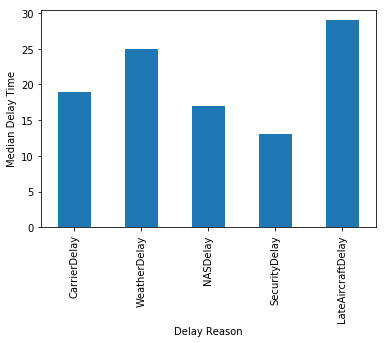

In [21]:
# bar chart of the mean delay time for each delay reason
df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().plot(kind = 'bar', color = base_color);
plt.ylabel('Mean Delay Time');
plt.xlabel('Delay Reason');
plt.show()

# bar chart of the median delay time for each delay reason
df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].median().plot(kind = 'bar', color = base_color);
plt.ylabel('Median Delay Time');
plt.xlabel('Delay Reason');
plt.show()

> The mean and median of the delay time follow a similar trend along the categories. However, mean delay times were larger than the median delay times. This shows that the distribution of the delay times are left-skewed. Interestingly, the mean delay time across each category does not follow the same trend as the delay counts. Although weather delays did not occur frequently compared to the other delay reasons, when there was a weather delay, the delay was generally longer than the other delay reasons with the exception of late aircraft delays. Also, we see that even though NAS delays were the most common delay reason, the delay time was relatively short. Security counts and delay times are both short, suggesting that security does not have a large effect on delays.

> Finally, we look at a histogram of the air time.

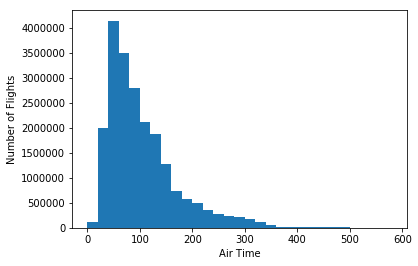

In [58]:
# histogram of the air time
bins = np.arange(0, 600, 20)
plt.hist(data = df, x = 'AirTime', bins = bins);
plt.ylabel('Number of Flights');
plt.xlabel('Air Time');

> The histogram of the air time shows that the distribution was left-skewed, which means that most flights were not long. However, there is a long tail, which means there are some flights which are long in duration.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the number of flights each month, the values were similar. Most flights were not cancelled, as displayed by the count plot of the 'Cancelled' variable. We also obtained some important insights about the delay reason, the delay counts and the delay times. One point also to note, is that there is one additional delay reason, that of late aircrafts. This is not present in the cancellation reasons data, probably because flights are not cancelled because of late aircrafts. One transformation that was performed was to convert the cancellation code to the cancellation reason. This was done mostly for convenience when plotting the data (so we do not have to made the code to the reason for the plots).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We saw the delay times and air times had distributions that were left-skewed. All operations were performed in the data wrangling stage, so no changes to the form of the data had to be done before plotting.

## Bivariate Exploration

> Now, we perform bivariate explorations of the variables of interest. First, we look at the correlation between month and cancellation reason.

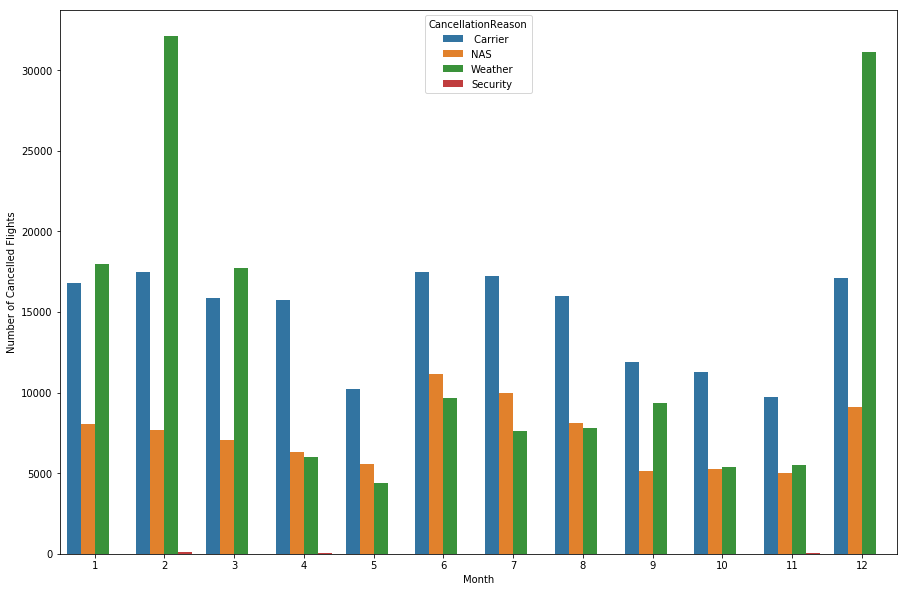

In [26]:
# clustered bar chart of the cancellation reason counts for each month
plt.figure(figsize = (15, 10));
sb.countplot(data = df, x = 'Month', hue = 'CancellationReason');
plt.ylabel('Number of Cancelled Flights');

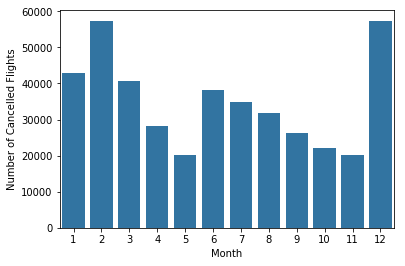

In [27]:
# bar chart of the cancellation count per month
sb.countplot(data = df.query('Cancelled == 1'), x = 'Month', color = base_color);
plt.ylabel('Number of Cancelled Flights');

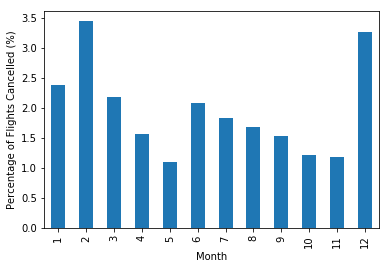

In [51]:
# bar chart of the cancellation count per month normalized by number of flights
normalized_cancellations_month = (df.groupby('Month')['CancellationReason'].count() / df['Month'].value_counts()) * 100
normalized_cancellations_month.plot.bar(color = base_color);
plt.ylabel('Percentage of Flights Cancelled (%)');
plt.xlabel('Month');

> Interestingly, we see a few trends. Cancellations because of carriers and NAS were quite steady across the months, while weather cancellations were concentrated from December to March. This makes sense because these are the winter months, and intuitively, cold weather and storms can cause a heightened number of cancellations. For security delays, they seem to happen more commonly in Febuary, April and November. The two months with the most cancellations and percentage of flights that were cancelled was December and February, so it may be better to avoid these months it you do not want your flight to be cancelled. The months with the least cancellations were May, October and November.

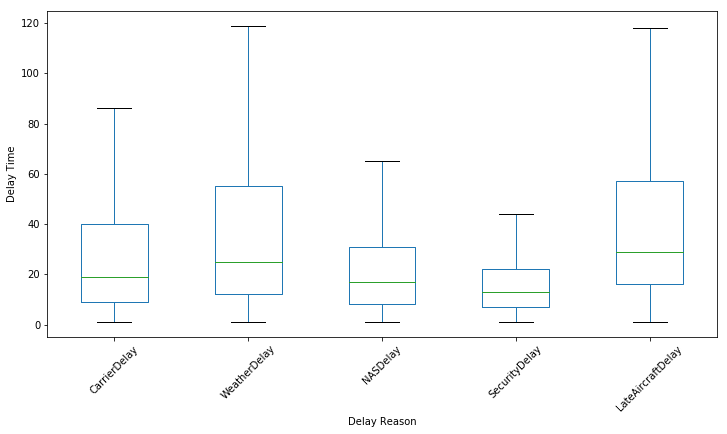

In [52]:
# box plot of the delay times for each delay reason
plt.figure(figsize = (12, 6));
df.boxplot(column = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], showfliers = False);
plt.xticks(rotation = 45);
plt.grid(b = None);
plt.ylabel('Delay Time');
plt.xlabel('Delay Reason');

> The box plot of the delay reasons show, as expected from previous plots, the delay times were left-skewed. Also, the weather and late aircraft delays times had a longer tail even though their medians were only slightly larger.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


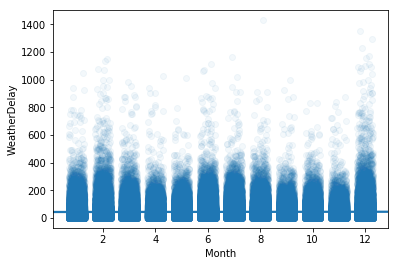

In [53]:
# scatter plot with jitter and transparency of the weather delay time vs. month
sb.regplot(data = df, x = 'Month', y = 'WeatherDelay', x_jitter = 0.3, scatter_kws = {'alpha' : 1/20});

> We want to look closer at the weather delay times because we noticed that cancellations were more common in winter, and we want to see if the same is true. The scatter plot of the weather delay time per month show that indeed February and December generally have longer delay times from weather. However, other months such as June and July also had long delay times from weather, suggesting that the effect is not as prominent in delays compared to cancellations.

> Lastly, we look at the correlation between air times and weather delay times to see if there was any correlation.

In [54]:
# Convert negative air times to positive
# (we assume that it was calculated incorrectly, probably by mistakenly using the start time minus the end time)
df['AirTime'] = df['AirTime'].apply(np.absolute)

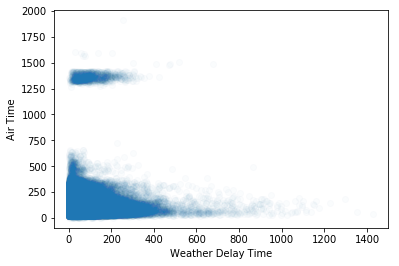

In [55]:
# scatter plot of air time vs. weather delay time with transparency
plt.scatter(data = df, x = 'WeatherDelay', y = 'AirTime', alpha = 1/50);
plt.xlabel('Weather Delay Time');
plt.ylabel('Air Time');

> Here, we see that there is no obvious correlation. However, one thing that appears is that flights with weather delays either flew for 0-700 minutes or 1250-1500 minutes. For weather delayed flights, there were no flights that flew between 700-1250 minutes. This is surprising because the histogram of air times show that the majority of the distribution is between 0-600 minutes (thus the large number of weather delayed flights with air times between those values), but there is no spike in the air time distribution from 1250-1500 minutes from our previous histogram. We will look further into this with some other plots.

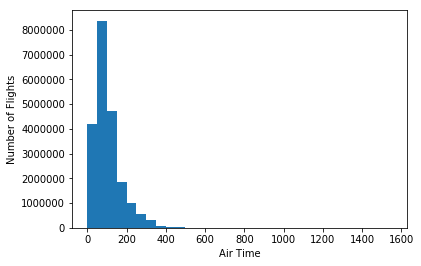

In [61]:
# histogram of the air time extended to 1600 min
bins = np.arange(0, 1600, 50)
plt.hist(data = df, x = 'AirTime', bins = bins);
plt.ylabel('Number of Flights');
plt.xlabel('Air Time');

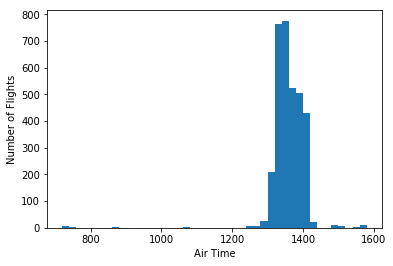

In [63]:
# histogram of the air time from 720-1600 min
bins = np.arange(720, 1600, 20)
plt.hist(data = df, x = 'AirTime', bins = bins);
plt.ylabel('Number of Flights');
plt.xlabel('Air Time');

> We see that when we focus on the air time of the flights from 720-1600 min, there seems to be another mode in the distribution from around 1200-1500 min, although at a significantly lower number than the original mode of the distribution. This was masked in the original histogram because of its low number and presents an interesting observation from our results.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First, we investigated the cancellations in relation to the cancellation reason and month. We found that the winter months, in particular Febuary and December, had a larger frequency of cancellations, especially from weather reasons. The months with the least cancellations were May, October and November. We also confirmed from the box plot that the distribution of the delay times for all the reasons were left-skewed. Weather delays were more common in February and December as well, although the effect did not seem to be as prominent as for cancellations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When investigating the correlation between air time and weather delay time, we found that there seemed to be no correlation but for some reason weather delayed flights did not fall between 700-1250 min. We looked further into this by investigating the histogram of the air time from 720-1600 min. This revealed that there was another mode in the air time data between 1200-1500 min. This explained our air time and weather delay time results, and was a fascinating observation that was missed in the previous plots.

## Multivariate Exploration

> We begin our multivariate exploration by investigating the correlation between air time and delay time for all the delay reasons.

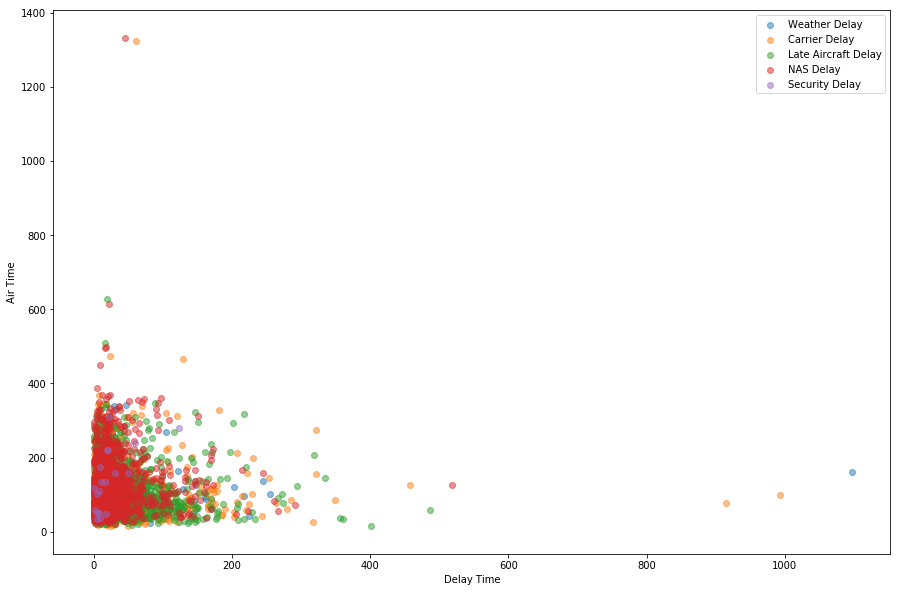

In [67]:
# manually plot scatter plot of air time vs. delay time for the various delay reasons
plt.figure(figsize = (15, 10));
plt.scatter(data = df.sample(10000), x = 'WeatherDelay', y = 'AirTime', alpha = 1/2);
plt.scatter(data = df.sample(10000), x = 'CarrierDelay', y = 'AirTime', alpha = 1/2);
plt.scatter(data = df.sample(10000), x = 'LateAircraftDelay', y = 'AirTime', alpha = 1/2);
plt.scatter(data = df.sample(10000), x = 'NASDelay', y = 'AirTime', alpha = 1/2);
plt.scatter(data = df.sample(10000), x = 'SecurityDelay', y = 'AirTime', alpha = 1/2);
plt.legend(labels = ['Weather Delay', 'Carrier Delay', 'Late Aircraft Delay', 'NAS Delay', 'Security Delay']);
plt.xlabel('Delay Time');
plt.ylabel('Air Time');

> This plot shows that all delay reasons are similar in their correlation with air time. Most of the delay times were focused between 0-100 min and most of the air times were focused between 0-400 min. There were some extreme values with long delay times or long air times. One point of interest is that although long delay times and air times were present, there were no flights with both long delay times and long air times.

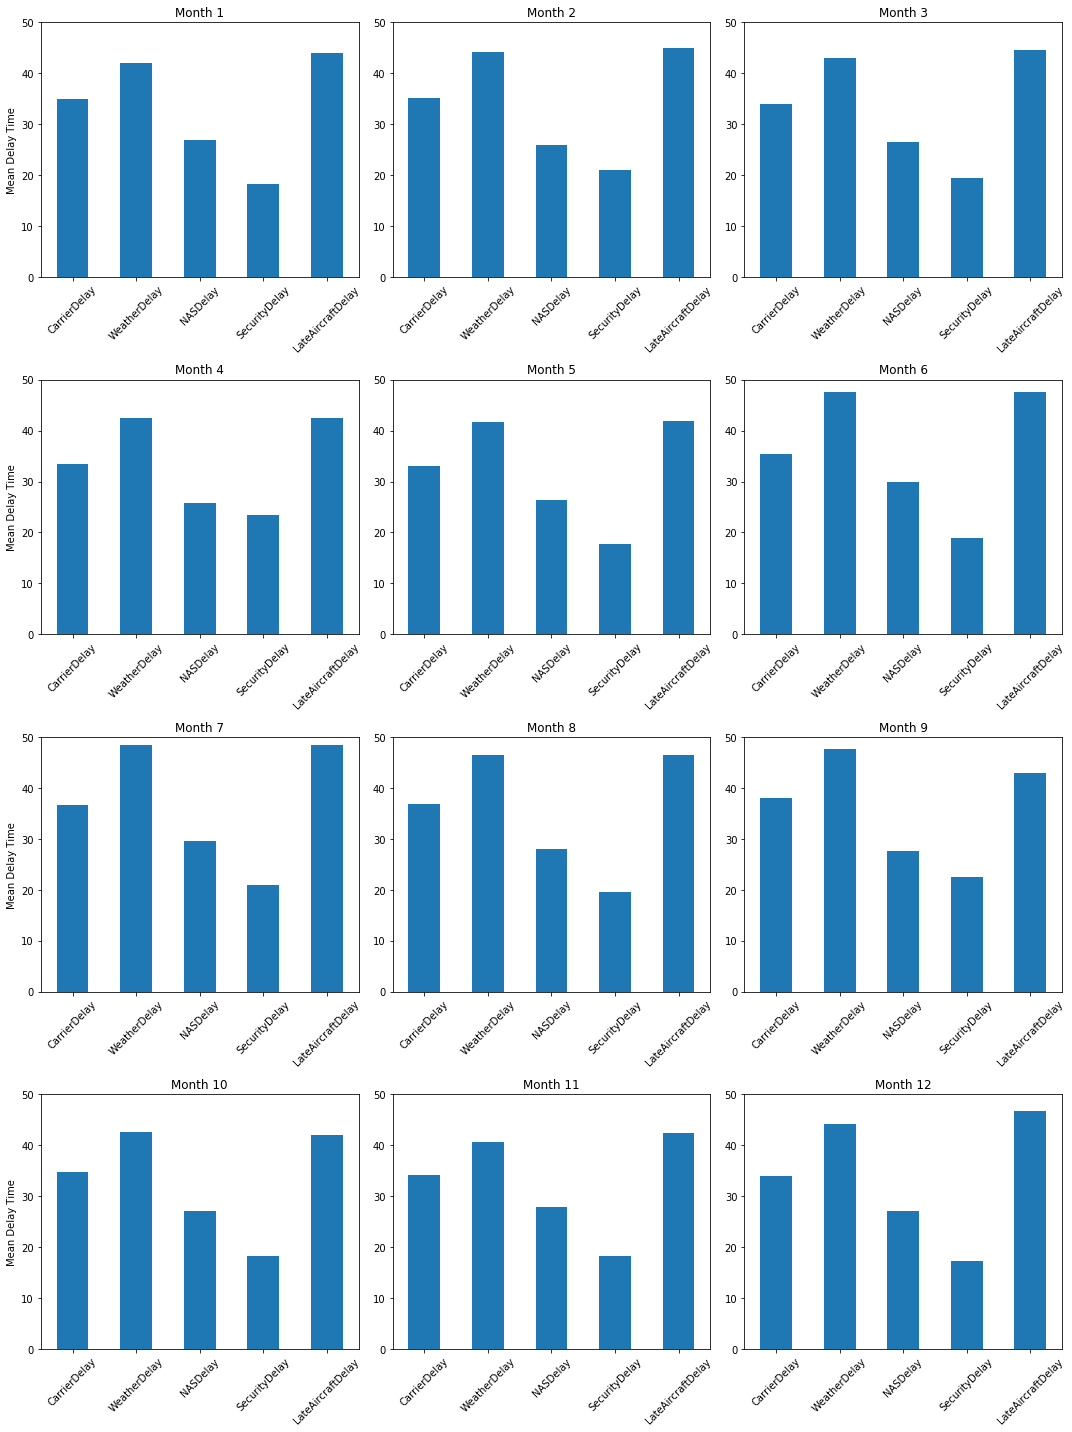

In [69]:
# Use loop to plot facet grid ordered by month for each plot with delay time vs. delay reason
plt.figure(figsize = (15, 20))
for i in np.arange(1, 13):
    plt.subplot(4, 3, i)
    if i in np.arange(1, 13, 3):
        plt.ylabel('Mean Delay Time')
    df.query('Month == {}'.format(i))[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().plot(kind = 'bar', color = base_color);
    plt.ylim(0, 50)
    plt.xticks(rotation = 45)
    plt.title('Month {}'.format(i))
    plt.tight_layout()

> Next, we investigate the mean delay time and reason for each month in a facet grid. From our previous plot, we know that February and December had the largest number of cancelled flights. In our results, we see that the mean delay time for each delay reason was relatively consistent throughout the months in terms of their distribution between the reasons. To see the mean delay times by delay reason, the results can be better visualized in a line plot.

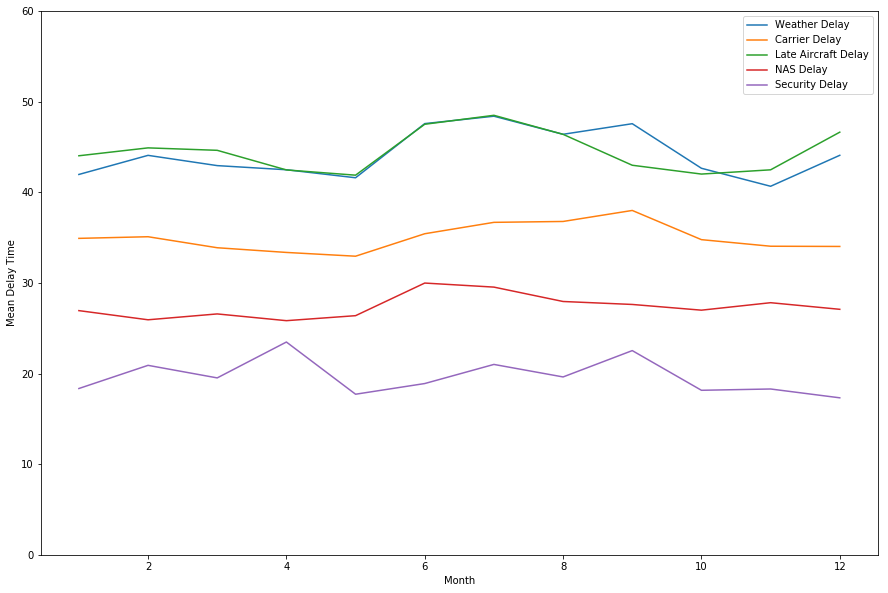

In [90]:
# line plot of mean delay time by delay reason and month
plt.figure(figsize = (15, 10));
df.groupby(['Month'])['WeatherDelay'].mean().plot.line();
df.groupby(['Month'])['CarrierDelay'].mean().plot.line();
df.groupby(['Month'])['LateAircraftDelay'].mean().plot.line();
df.groupby(['Month'])['NASDelay'].mean().plot.line();
df.groupby(['Month'])['SecurityDelay'].mean().plot.line();
plt.ylabel('Mean Delay Time');
plt.ylim(0, 60);
plt.legend(labels = ['Weather Delay', 'Carrier Delay', 'Late Aircraft Delay', 'NAS Delay', 'Security Delay'], loc='upper right');

> In our final plot, we see the trend across each month of the mean delay time for each reason. Here, we see that weather delay and late aircraft delays had the largest mean delay times. Also, their mean delay times were similar in value and occasionally one would overtake the other. There were individual trends for each delay reason for which month had a longer mean delay time. For example, security had a larger mean delay time in April and September, NAS in June, carriers in September, and weather and late aircrafts from around June to August.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Plotting the correlation between air time and delay time across the different delay reasons showed similarities for all the delayed reasons. The facet grid and line plot revealed that weather and late aircrafts resulted in the longest mean delay times, with the longest depending on the month. Overall, there did not seem to be a significant or obvious correlation between mean delay time and month.

### Were there any interesting or surprising interactions between features?

> One point that was noted was that there were no flights with both long delay times and long air times. This is an unintuitive result and shows a potential characteristic of delayed flights. A possible reason is that long flights that were delayed for a long time are more likely to be cancelled and therefore do not show up in the data.

In [91]:
# save cleaned data to csv
df.to_csv('us_flights_2006-2008_clean.csv')